# Socially Generated Positive Reinforcement on Social Media

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Read in cleaned data

In [2]:
data = pd.read_csv('twitterData')

### Split posts by if they have a video/photo or not

T-test on if media is differenbt than normal posts

In [3]:
display(data.head(2))

,tweeted_at,text,in_reply_to_screen_name,is_quote_status,retweet_count,favorite_count,possibly_sensitive,tweet_lang,user_id,name,...,favorites_count,verified,statuses_count,has_media,has_user_mentions,timeSinceLastPost,zScoreFav,zScoreRT,hourDiff,minDiff
0,2023-03-14 16:09:51+00:00,We can refrain from trying to liberate Crimea ...,False,False,0,1,0.0,en,14186393,Aron Goldman,...,335012,False,914796,True,False,0 days 00:00:00,-0.171396,-0.263940,0.0,0.0
1,2023-03-14 16:08:34+00:00,Kyiv International Institute of Sociology (KI...,True,False,2,4,0.0,en,14186393,Aron Goldman,...,335012,False,914796,True,False,0 days 00:00:00,-0.086244,0.226234,0.0,0.0


Ttest_indResult(statistic=4.699986927419472, pvalue=2.9996669567719264e-06)
2.8464285714285715
2.016457461645746


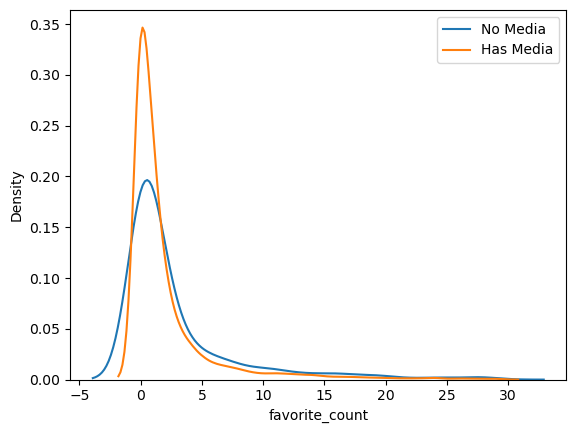

In [4]:
numLikesNormal = data.query('has_media == False and favorite_count < 30')['favorite_count']
numLikesMedia = data.query('has_media == True and favorite_count < 30')['favorite_count']
print(stats.ttest_ind(numLikesNormal,numLikesMedia,equal_var=False))
print(sum(numLikesNormal)/len(numLikesNormal))
print(sum(numLikesMedia)/len(numLikesMedia))
a = sns.kdeplot(numLikesNormal)
b = sns.kdeplot(numLikesMedia)
a.legend(loc='upper right',labels = ['No Media', 'Has Media'])

Ttest_indResult(statistic=-11.498983705355164, pvalue=3.0076342612543152e-18)
0.5
2.5399770466717673


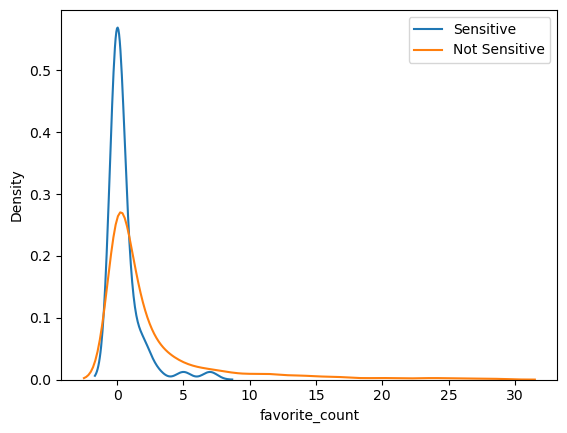

In [5]:
numLikesSens = data.query('possibly_sensitive == 1.0 and favorite_count < 30')['favorite_count']
numLikesSafe = data.query('possibly_sensitive == 0.0 and favorite_count < 30')['favorite_count']
print(stats.ttest_ind(numLikesSens,numLikesSafe,equal_var=False))
print(sum(numLikesSens)/len(numLikesSens))
print(sum(numLikesSafe)/len(numLikesSafe))
a = sns.kdeplot(numLikesSens)
b = sns.kdeplot(numLikesSafe)
a.legend(loc='upper right',labels = ['Sensitive', 'Not Sensitive'])

In [6]:
data.location.value_counts()

Utah                            423
Music wonderland                308
Canada                          291
United States                   236
Utah, USA                       183
                               ... 
North Las Vegas, Nevada, USA      5
Brasil                            4
Maryland. Again.                  2
New Delhi, India                  2
Saxony, Germany                   1
Name: location, Length: 159, dtype: int64

I don't think demographics data is going to work